In [1]:
import cv2

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
import matplotlib.pyplot as plt

In [4]:
#taking 15 images each from 101 to 115
def all(dim):
    data = []
    output = []
    for i in range(15):
        output.append(0)
        output.append(1) 
    for i in range(1,16):
        if(i<=9):
            a = "0"+str(i)
        else:
            a = str(i)
        img = cv2.imread("Data/Cat/cat.1"+a+".jpg")
        img.resize(dim,dim,3)
        img = img.flatten()
        data.append(img)


        img = cv2.imread("Data/Dog/dog.1"+a+".jpg")
        img.resize(dim,dim,3)
        img = img.flatten()
        data.append(img)
    xtrain, xtest, ytrain, ytest = train_test_split(data,output, test_size = 0.25)
    model = LogisticRegression()    
    model.fit(xtrain,ytrain)    
    a = model.score(xtest,ytest)    
    b = model.score(xtrain,ytrain)
    return a,b


In [5]:
li = [10,25,50,100,500]
test = []
train = []
for i in li:
    a,b = all(i)
    test.append(a)
    train.append(b)

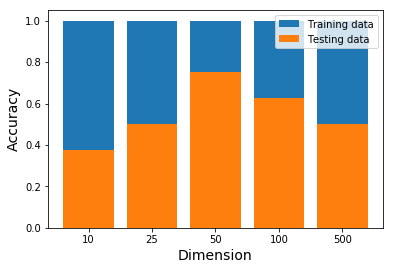

In [16]:
# plt.plot()
plt.bar(list(map(str,li)), train, label = "Training data")
plt.bar(list(map(str,li)), test, label = "Testing data")
plt.xlabel("Dimension", fontsize = "14")
plt.ylabel("Accuracy", fontsize = "14")
plt.legend()
plt.show()